# Python Realisation of Section 4.6 in Notes
Marginals:
$$
\begin{align}
R^S &= X_1 = Z + Z_1\\
R^F &= X_2 = Z + Z_2\\
\end{align}
$$
where 
$
Z \bot Z_1 \bot Z_2
$ (bad notation... should be mutually independent)


$$Z \sim \text{NIG}(\alpha, \beta, 0, \delta)$$
$$Z_1 \sim \text{NIG}(\alpha, \beta, 0, \delta_1)$$
$$Z_2 \sim \text{NIG}(\alpha, \beta, 0, \delta_2)$$
so
$$
X_1 \sim \text{NIG}(\alpha, \beta, 0, \delta + \delta_1)\\
X_2 \sim \text{NIG}(\alpha, \beta, 0, \delta + \delta_2)
$$
We have
$$
\begin{align}
R^h &= X_1 - hX_2 \\
&= Z + Z_1-hZ-hZ_2\\
&= (1-h)Z + Z_1 -hZ_2
\end{align}
$$

By convolution of probability density:
$$f_{Z_1 - hZ_2}(z) = \int_{-\infty}^\infty f_{Z_1}(x) \cdot f_{-hZ_2}(z-x) dx$$
$$\begin{align}
f_{R^h}(r) &= \int_{-\infty}^\infty f_{(1-h)Z}(y) \cdot f_{Z_1 - hZ_2}(r-y)dy\\
&=\int_{-\infty}^\infty f_{(1-h)Z}(y)\int_{-\infty}^\infty f_{Z_1}(x) \cdot f_{-hZ_2}(r-y-x) dxdy\\
&=\int_{-\infty}^\infty \int_{-\infty}^\infty f_{(1-h)Z}(y) \cdot f_{Z_1}(x) \cdot f_{-hZ_2}(r-y-x) dxdy
\end{align}$$

In [1]:
from toolbox import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.set_printoptions(precision=4,suppress=True)

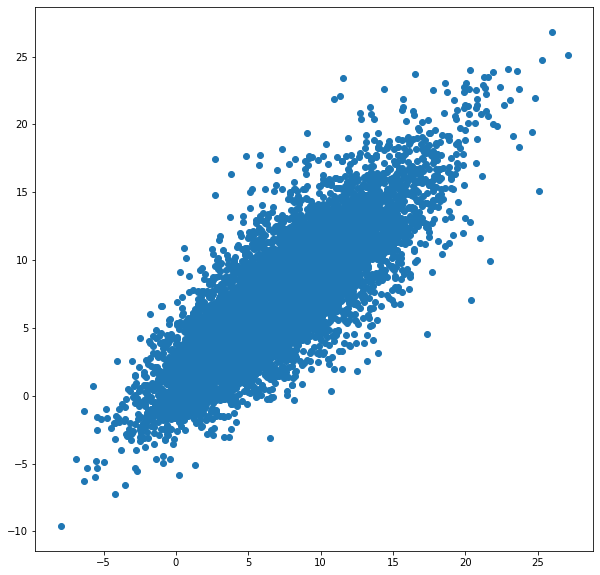

In [2]:
alpha  = 1
beta   = 0.5
gamma = np.sqrt(alpha**2 - beta**2)
mu     = 0
delta  = 10
delta1 = 2
delta2 = 2
size = 10000
h = 0.95

Z_law  = norminvgauss(alpha, beta, mu, delta)
Z1_law = norminvgauss(alpha, beta, mu, delta1)
Z2_law = norminvgauss(alpha, beta, mu, delta2)

Z  = Z_law.rvs(size)
Z1 = Z1_law.rvs(size)
Z2 = Z2_law.rvs(size)

X1 = Z + Z1
X2 = Z + Z2

X1_law = norminvgauss(alpha, beta, mu, delta+delta1)
X2_law = norminvgauss(alpha, beta, mu, delta+delta2)

Rh = X1 - h*X2 

Z_law_transformed  = norminvgauss(alpha, beta, mu, delta,  {"a":1-h, "b":0})
Z2_law_transformed = norminvgauss(alpha, beta, mu, delta2, {"a": -h, "b":0})

plt.figure(figsize=(10,10))
plt.scatter(X1, X2)

In [4]:
def f_Rh(r):
    integrand = lambda x,y,r: Z_law_transformed.pdf(y)*Z1_law.pdf(x)*Z2_law_transformed.pdf(r-y-x)
    integrand_fn = partial(integrand, r=r)
    return scipy.integrate.nquad(integrand_fn, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]


0.19054844896594417

In [5]:
%%time
x = np.linspace(-10,10,100)
results = np.ones(len(x))
for i in tqdm(range(len(x))):
    results[i] = f_Rh(x[i])

100%|██████████| 100/100 [01:04<00:00,  1.55it/s]

CPU times: user 1min 4s, sys: 168 ms, total: 1min 4s
Wall time: 1min 4s


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


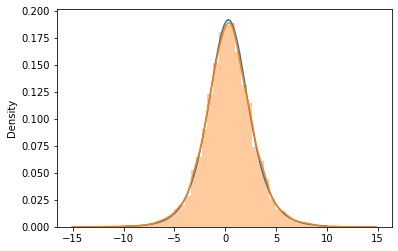

In [6]:
plt.plot(x, results)
sns.distplot(Rh)

$$\begin{align}
\phi_h(u) &:= \mathbb{E}\left(e^{iu R^h} \right)\\
&= 
\mathbb{E}\left[ e^{iu(1-h)Z}\right] \cdot
\mathbb{E}\left[ e^{iuZ_1}\right] \cdot
\mathbb{E}\left[ e^{-iuhZ_2}\right]\\
&= 
\phi_{(1-h)Z}(u) \cdot
\phi_{Z_1}(u) \cdot
\phi_{-hZ_2}(u)
\end{align}$$

In [7]:
def f_Rh_CF(r):
    CF = lambda u: Z_law_transformed.CF(u) * Z1_law.CF(u) * Z2_law_transformed.CF(u)
    integrand = lambda u, r: np.exp(-1j*u*r)*CF(u)
    integrand_fn = partial(integrand, r=r)
    return scipy.integrate.quad(integrand_fn, -np.inf, np.inf)[0]/(2*np.pi)

In [8]:
%%time
x = np.linspace(-10,10,100)
results = np.ones(len(x))
for i in tqdm(range(len(x))):
    results[i] = f_Rh_CF(x[i])

  0%|          | 0/100 [00:00<?, ?it/s]/Users/francis/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:450: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)
100%|██████████| 100/100 [00:01<00:00, 81.97it/s]

CPU times: user 1.21 s, sys: 11.5 ms, total: 1.22 s
Wall time: 1.22 s


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


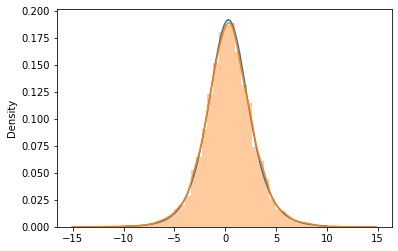

In [9]:
plt.plot(x, results)
sns.distplot(Rh)

## Method of Moments


In [10]:
import sympy as sym
from sympy.utilities.lambdify import lambdastr, lambdify

$$\begin{align}
\phi_h(u) &:= \mathbb{E}\left(e^{iu R^h} \right)\\
&= 
\mathbb{E}\left[ e^{iu(1-h)Z}\right] \cdot
\mathbb{E}\left[ e^{iuZ_1}\right] \cdot
\mathbb{E}\left[ e^{-iuhZ_2}\right]\\
&= 
\phi_{(1-h)Z}(u) \cdot
\phi_{Z_1}(u) \cdot
\phi_{-hZ_2}(u)
\end{align}$$

In [11]:
a,b,m,d,d1,d2,z,h= sym.symbols('a b m d d1 d2 z h')

MGF0 = sym.exp((1-h)*m*z + sym.Abs(1-h)*d*\
               (sym.sqrt( (a/sym.Abs(1-h))**2 - (b/(1-h))**2)-\
                sym.sqrt( (a/sym.Abs(1-h))**2 - (b/(1-h)+z)**2)))

MGF1 = sym.exp(m*z+ d1*(sym.sqrt(a**2-b**2) - sym.sqrt(a**2-(b+z)**2)))

MGF2 = sym.exp((-h)*m*z+ sym.Abs(-h)*d2*\
               (sym.sqrt((a/sym.Abs(-h))**2 - (b/(-h))**2) -\
                sym.sqrt((a/sym.Abs(-h))**2-(b/(-h) +z)**2)))

mu1 = sym.diff(MGF0*MGF1*MGF2,z,1).subs({z:0})
mu2 = sym.diff(MGF0*MGF1*MGF2,z,2).subs({z:0})
mu3 = sym.diff(MGF0*MGF1*MGF2,z,3).subs({z:0})
mu4 = sym.diff(MGF0*MGF1*MGF2,z,4).subs({z:0})
mu5 = sym.diff(MGF0*MGF1*MGF2,z,5).subs({z:0})
mu6 = sym.diff(MGF0*MGF1*MGF2,z,6).subs({z:0})

f1 = lambdify([a,b,m,d,d1,d2,h], mu1)
f2 = lambdify([a,b,m,d,d1,d2,h], mu2)
f3 = lambdify([a,b,m,d,d1,d2,h], mu3)
f4 = lambdify([a,b,m,d,d1,d2,h], mu4)
f5 = lambdify([a,b,m,d,d1,d2,h], mu5)
f6 = lambdify([a,b,m,d,d1,d2,h], mu6)

In [12]:
f1_fn = lambda arg: f1(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f2_fn = lambda arg: f2(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f3_fn = lambda arg: f3(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f4_fn = lambda arg: f4(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f5_fn = lambda arg: f5(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)
f6_fn = lambda arg: f6(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],0.95)

In [26]:
mu1_hat = np.mean(Rh)
mu2_hat = np.mean((Rh)**2)
mu3_hat = np.mean((Rh)**3)
mu4_hat = np.mean((Rh)**4)
mu5_hat = np.mean((Rh)**5)
mu6_hat = np.mean((Rh)**6)
# mu1_hat=0

In [27]:
g_fn = lambda arg: np.array([f1_fn(arg)-mu1_hat, f2_fn(arg)-mu2_hat,
                             f3_fn(arg)-mu3_hat, f4_fn(arg)-mu4_hat,
                             f5_fn(arg)-mu5_hat, f6_fn(arg)-mu6_hat])

In [28]:
opt_fn = lambda arg: g_fn(arg).T.dot(g_fn(arg))
# opt_fn = lambda arg: g_fn(arg).dot(g_fn(arg))


In [29]:
results = scipy.optimize.fmin(opt_fn,
                              x0=(1,0.5,0,10,2,2),
                              xtol=1e-8, 
                              maxiter=1000000,
                              maxfun=40000)

Optimization terminated successfully.
         Current function value: 0.045103
         Iterations: 1491
         Function evaluations: 2375


In [30]:
print(opt_fn(results),
results)

0.04510289030717738 [ 1.4325  0.8438 -0.0016 25.3817  1.9754  2.8557]


In [31]:
opt_fn((0.9615,0.481,-0.0008,11.6705,1.8978,1.9473))
# opt_fn(results.x)

12696255.883277904

In [32]:
arg = (1,0.5,0,10,2,2)
opt_fn(arg)

6223232.666426424

In [33]:
f1_fn(arg)-mu1_hat

0.010192183645116593

In [38]:
f6_fn(arg)-mu6_hat

2489.0560406401673

In [432]:
opt_fn(results.x)

(-4.088371227662001e+19+1205715561426.3528j)

In [ ]:
alpha  = 1
beta   = 0.5
gamma = np.sqrt(alpha**2 - beta**2)
mu     = 0
delta  = 10
delta1 = 2
delta2 = 2